# 00b. Guessing the number of marbles in a vase

In this lesson you will learn:
- Solve an unstructured search problem with a quantum algorithm.
- Gain a quadratic advantage over classical algorithms with Grover's algorithm.
- Get a high-level overview of what is covered in this course.

In [1]:
# Specific install for Kaggle Notebooks environment
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

# Kaleido is used to convert Plotly to static png
!pip install -Uqq kaleido
!pip install -Uqq skq

In [2]:
import numpy as np
from skq.circuits import Grover

import plotly.graph_objects as go

# Fix Plotly rendering in Jupyter forks.
# If you are running this notebook locally you can comment this out.
# This allows you to play with interactive Plotly plots.
import plotly.io as pio
pio.renderers.default = 'png'

This notebook will give you a high-level overview of a practical problem where we can gain a (quadratic) advantage over classical algorithms using a quantum algorithm. This notebook also provides an outline of the topics discussed in this course. To solve our first problem with a quantum algorithm we are going to guess the number of marbles in a hidden vase.

# <center>![](https://images.stockcake.com/public/c/4/6/c46c559a-800b-439d-ab95-aa0bc4d73f29_large/colorful-marbles-display-stockcake.jpg)</center>


Imagine your friend has a vase with marbles hidden inside a closet. You can have unlimited guesses at how many marbles are in the vase. Each time you guess your friend will tell you if it is the right answer or not.

Classically you would start going through all the options. $0, 1, 2,$ etc. In the worst case you will end up guessing $n$ times, where $n$ is the number of marbles in the vase. What if I told you that with a quantum algorithm we can guess the number of marbles with only $\sqrt{n}$ guesses? That is, if your friend is part of the quantum system.

Let's say there can be a maximum of $255$ marbles in the vase. Then in the worst case the classical algorithm will have to take $256$ guesses. With a quantum algorithm we can achieve a worst case of approximately $\sqrt{256} = 16$ guesses. We do this by leveraging quantum interference and entanglement.

The name of the algorithm we will use is **Grover's algorithm**, which is discussed in detail in notebook 5. In this notebook we will just use the algorithm to guess the number of marbles in the vase.

In [3]:
n_qubits = 8
# Generate secret random state (vase with marbles in the closet)
target_state = np.zeros((2**n_qubits))
random_index = np.random.randint(2**n_qubits)
target_state[random_index] = 1

In [4]:
# Execute Grover's search algorithm
grover = Grover().get_grover_circuit(n_iterations=6, n_qubits=n_qubits, target_state=target_state)
result = grover(np.array([1]+[0]*(len(target_state)-1)))

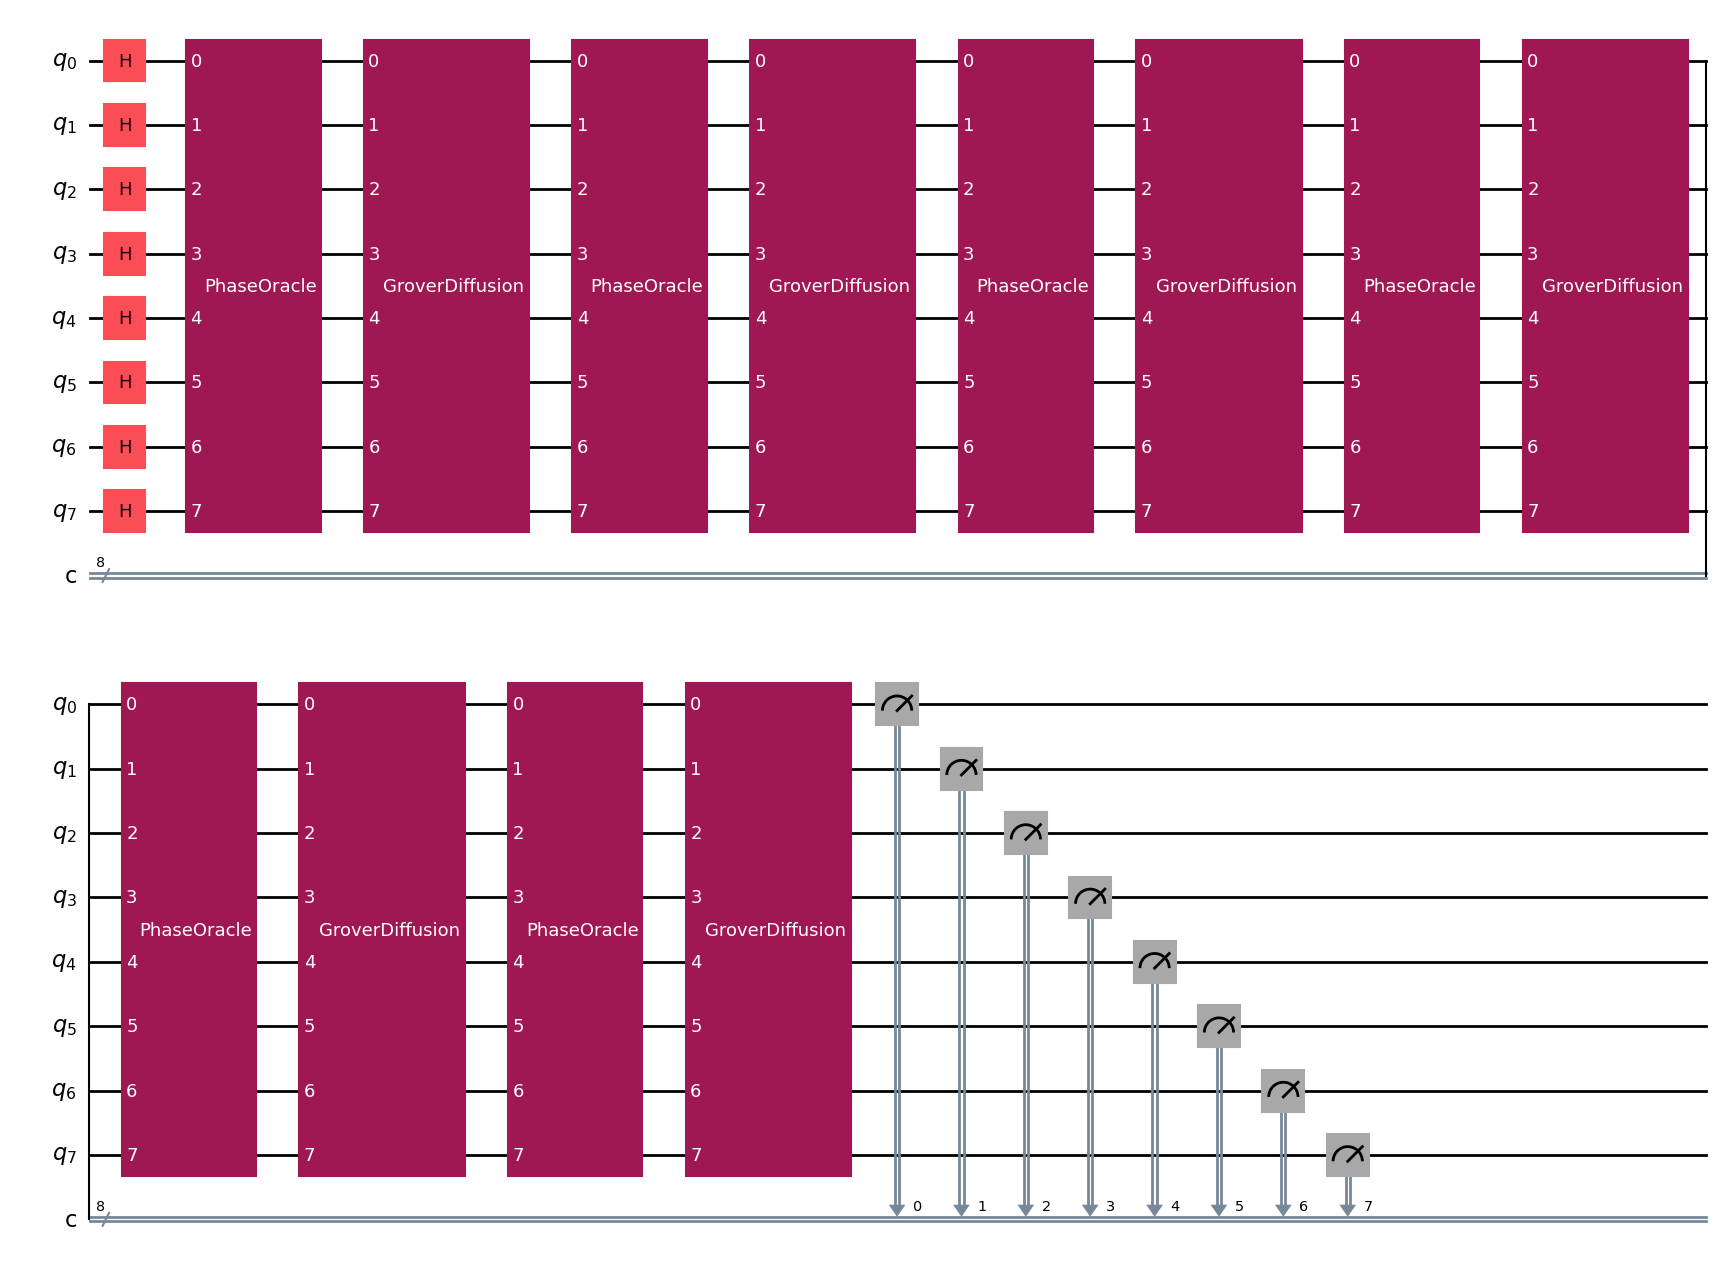

In [5]:
grover.draw(output='mpl')

Don't worry about the details of this circuit for now. In notebook 2 we will learn more about quantum logic gates and how they work in a quantum computer. For now note that the layers of $H$'s are needed to leverage quantum interference. `PhaseOracle` is like your friend that tells you if you got the right answer or not. `GroverDiffusion` is a rotation that amplifies the probability of the correct answer. The symbols at the end are measurements, which is discussed at length in notebook 1.

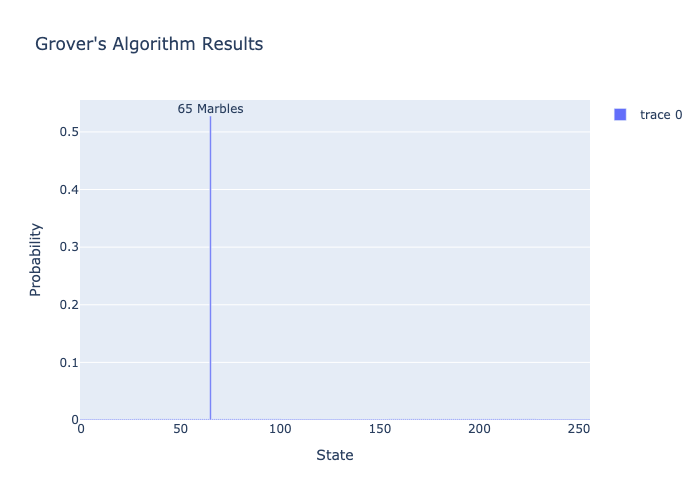

In [6]:
max_idx = np.argmax(result)
max_val = result[max_idx]

fig = go.Figure(data=[
    go.Bar(x=list(range(len(result))), y=result),
    go.Scatter(
        x=[max_idx],
        y=[max_val],
        mode='text',
        text=[f'{max_idx:.0f} Marbles'],
        textposition='top center',
        marker=dict(color='green'),
        showlegend=False
    )
])
fig.update_layout(
    title="Grover's Algorithm Results", 
    xaxis_title="State",
    yaxis_title="Probability"
)
fig.show()

In [7]:
print(f"Guessed number of marbles: '{np.argmax(result.round())}'")
print(f"Number of marbles in the vase: '{np.argmax(target_state)}'")
print(f"Answer is {'correct' if np.argmax(result.round()) == np.argmax(target_state) else 'incorrect'}!")

Guessed number of marbles: '65'
Number of marbles in the vase: '65'
Answer is correct!


Congratulations, you've just built and ran your first quantum algorithm! Note that what we have run here is a classical simulation of the quantum algorithm using NumPy. To run the algorithm on a real quantum computer we have to convert the circuit to a quantum computing framework and run it on a cloud quantum computer. One popular framework is IBM's Qiskit. We can easily convert the circuit we have built to Qiskit.

In [8]:
qc = grover.convert(framework="qiskit")
qc

Notebook 8 will be all about how to run quantum algorithms on real quantum computers. 

A quadratic advantage over classical algorithms is already pretty cool! Though other algorithms like Shor's algorithm can gain exponential advantages over classical algorithms. Intrigued? Then this course is for you! 

I would recommend you start this course by learning more about qubits first in notebook 1. By going through the notebooks you will be able to gain a solid understanding of how these quantum algorithms work and you will be able to implement your own algorithms. 

After notebook 3 we will learn about practical quantum algorithms. 

From notebook 7 onwards we will dive into more advanced topics like working with real quantum hardware, transpilation, error correction, optimization, quantum machine learning and quantum information theory.
